In [27]:
!pip install yfinance


In [9]:
# import packages
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
startdate = '2016-12-26'
enddate = '2021-12-25'

AAPL = yf.download('AAPL',startdate, enddate)
TSLA = yf.download('TSLA', startdate, enddate)
AMZN = yf.download('AMZN',startdate, enddate)
MSFT = yf.download('MSFT', startdate, enddate)
FB = yf.download('AAPL',startdate, enddate)
GOOGL = yf.download('GOOGL', startdate, enddate)
NVDA = yf.download('NVDA', startdate, enddate)
AMD = yf.download('AMD', startdate, enddate)
WMT = yf.download('WMT',startdate, enddate)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Creating a Portfolio of Selected stocks

In [15]:
# Normalizing stock prices (cumulative returns)
for stock in (AAPL, TSLA, AMZN, MSFT, FB, GOOGL, NVDA, AMD, WMT):
    stock['Normalizing Return'] = stock['Adj Close']/stock.iloc[0]['Adj Close']

 # Setting Equal Weights 


In [52]:
for stock, allo in zip((AAPL, TSLA, AMZN, MSFT, FB, GOOGL, NVDA, AMD, WMT), [0.111111111,0.111111111,0.111111111,0.111111111,0.111111111,0.111111111,0.111111111,0.111111111,0.111111111
]):
    stock['Allocation'] = stock['Normalizing Return']*allo

In [53]:
#Assigning a value of $5000
for stock in (AAPL, TSLA, AMZN, MSFT, FB, GOOGL, NVDA, AMD, WMT):
    stock['Position Value'] = stock['Allocation']*15000

# Setting Up Portfolio Dollar Values


In [54]:
# create a list of all positional values 
# Create a list of all position values
position_values = [AAPL['Position Value'], TSLA['Position Value'], AMZN['Position Value'], MSFT['Position Value'], 
                   FB['Position Value'], GOOGL['Position Value'], NVDA['Position Value'] , AMD['Position Value'],
                   WMT['Position Value']]

# Concatenate the list of position values
position_values = pd.concat(position_values, axis=1)

# Name columns
position_values. columns = ['AAPL', 'TSLA', 'AMZN', 'MSFT', 'FB', 'GOOGL', 'NVDA', 'AMD', 'WMT']

# Add a total for entire portfolio
position_values['Total'] = position_values.sum(axis=1)
position_values.head()

,AAPL,TSLA,AMZN,MSFT,FB,GOOGL,NVDA,AMD,WMT,Total
Date,,,,,,,,,,
2016-12-27,1666.666665,1666.666665,1666.666665,1666.666665,1666.666665,1666.666665,1666.666665,1666.666665,1666.666665,14999.999985
2016-12-28,1659.560048,1668.261118,1668.243842,1659.028694,1659.559473,1655.636935,1552.023025,1594.863362,1657.340988,14774.517485
2016-12-29,1659.133676,1629.845675,1653.163079,1656.658409,1659.133562,1652.159263,1582.992258,1600.386693,1656.145562,14749.618178
2016-12-30,1646.199326,1622.329547,1620.149448,1636.641464,1646.199100,1630.696518,1516.365546,1565.865842,1652.797622,14537.244412
2017-01-03,1650.889876,1647.383065,1628.359602,1648.230198,1650.889303,1662.715741,1449.170332,1578.293370,1641.798530,14557.730017


<AxesSubplot:title={'center':'$15k Portfolio'}, xlabel='Date'>

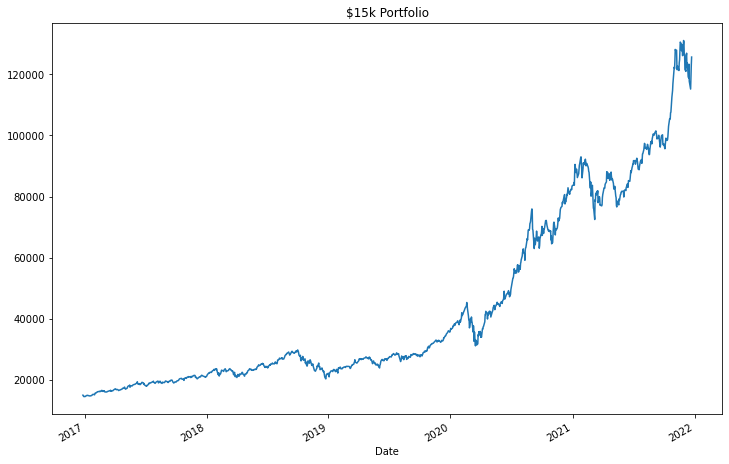

In [55]:
position_values['Total'].plot(figsize=(12,8), title='$15k Portfolio')

<AxesSubplot:title={'center':'Individual Stocks From Portfolio'}, xlabel='Date'>

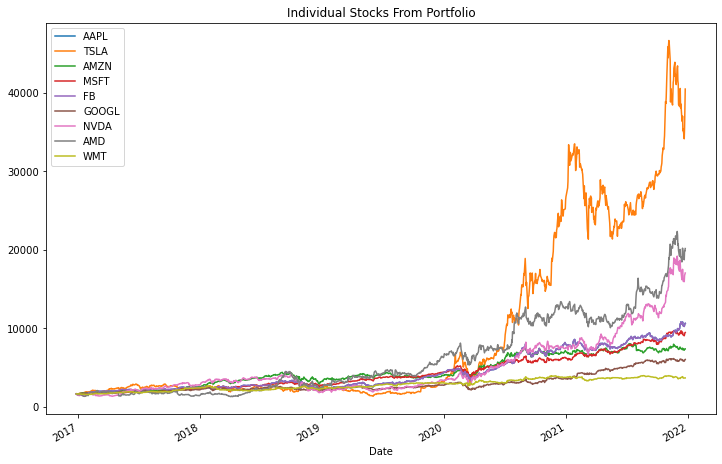

In [56]:
#plotting each stocks within portfolio 
position_values.drop('Total', axis=1).plot(figsize=(12,8), title='Individual Stocks From Portfolio')

In [57]:
# Cumulative portfolio return in terms of percent
cumulative_return = (position_values['Total'][-1]/position_values['Total'][0]-1) * 100
cumulative_return

737.6865255290365

In [58]:
# Calculating daily returns
position_values['Daily Return'] = position_values['Total'].pct_change(1)
position_values.head()

,AAPL,TSLA,AMZN,MSFT,FB,GOOGL,NVDA,AMD,WMT,Total,Daily Return
Date,,,,,,,,,,,
2016-12-27,1666.666665,1666.666665,1666.666665,1666.666665,1666.666665,1666.666665,1666.666665,1666.666665,1666.666665,14999.999985,NaN
2016-12-28,1659.560048,1668.261118,1668.243842,1659.028694,1659.559473,1655.636935,1552.023025,1594.863362,1657.340988,14774.517485,-0.015032
2016-12-29,1659.133676,1629.845675,1653.163079,1656.658409,1659.133562,1652.159263,1582.992258,1600.386693,1656.145562,14749.618178,-0.001685
2016-12-30,1646.199326,1622.329547,1620.149448,1636.641464,1646.199100,1630.696518,1516.365546,1565.865842,1652.797622,14537.244412,-0.014399
2017-01-03,1650.889876,1647.383065,1628.359602,1648.230198,1650.889303,1662.715741,1449.170332,1578.293370,1641.798530,14557.730017,0.001409


In [59]:
# Average daily return
position_values['Daily Return'].mean()

0.001868219926716265

In [60]:
# Standard deviation
position_values['Daily Return'].std()

0.018712962840927713

In [61]:
# Sharpe ratio (assuming Risk Free Rate to be close to zero)
sharpe_ratio = position_values['Daily Return'].mean() / position_values['Daily Return'].std()
sharpe_ratio

0.09983560287044563

In [38]:
# Annualize Sharpe ratio
sharpe_ratio_annualized = (252**0.5) * sharpe_ratio
sharpe_ratio_annualized

1.5848410631124303

# Set Up for Portfolio Optimization to reach the highest Sharpe Ratio 


In [62]:
stocks = pd.concat([AAPL['Adj Close'], TSLA['Adj Close'], AMZN['Adj Close'], MSFT['Adj Close'], FB['Adj Close'], GOOGL['Adj Close']
                  , NVDA['Adj Close'] , AMD['Adj Close'], WMT['Adj Close']], axis=1)
stocks.columns = ['AAPL', 'TSLA', 'AMZN', 'MSFT', 'FB', 'GOOGL', 'NVDA', 'AMD', 'WMT']
stocks.head()

,AAPL,TSLA,AMZN,MSFT,FB,GOOGL,NVDA,AMD,WMT
Date,,,,,,,,,
2016-12-27,27.593676,43.905998,771.400024,58.836361,27.593681,809.929993,28.948442,12.07,62.981228
2016-12-28,27.476017,43.948002,772.130005,58.566727,27.476013,804.570007,26.957190,11.55,62.628822
2016-12-29,27.468958,42.936001,765.150024,58.483051,27.468962,802.880005,27.495096,11.59,62.583649
2016-12-30,27.254814,42.737999,749.869995,57.776417,27.254816,792.450012,26.337852,11.34,62.457134
2017-01-03,27.332472,43.397999,753.669983,58.185520,27.332468,808.010010,25.170734,11.43,62.041492


In [63]:
# Converting to percent change
stock_return = stocks.pct_change(1)
stock_return.head()

,AAPL,TSLA,AMZN,MSFT,FB,GOOGL,NVDA,AMD,WMT
Date,,,,,,,,,
2016-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-28,-0.004264,0.000957,0.000946,-0.004583,-0.004264,-0.006618,-0.068786,-0.043082,-0.005595
2016-12-29,-0.000257,-0.023027,-0.009040,-0.001429,-0.000257,-0.002101,0.019954,0.003463,-0.000721
2016-12-30,-0.007796,-0.004612,-0.019970,-0.012083,-0.007796,-0.012991,-0.042089,-0.021570,-0.002022
2017-01-03,0.002849,0.015443,0.005068,0.007081,0.002849,0.019635,-0.044313,0.007937,-0.006655


# Preparing variables for Portfolio Optimization (Combination with the highest Sharpe Ratio)


In [64]:
#setting up for a 5k different portfolio weighing combinations 
number_ports = 10000 
all_weights = np.zeros((number_ports, len(stocks.columns)))
all_weights

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
# Preallocating space for portfolio calculations
returns_array = np.zeros(number_ports)
volatility_array = np.zeros(number_ports)
sharpe_array = np.zeros(number_ports)

# Calculate Portfolio Combinations

In [66]:
# For replication from randomizer
import random
random.seed(3)
# Fun fact, different randomizer for numpy
np.random.seed(3)

for index in range(number_ports):
    #generate random weights
    numbers = np.array(np.random.random(9))
    weights = numbers/np.sum(numbers)
    
    #save weights
    all_weights[index, :] = weights
    
    #expected return
    returns_array[index] = np.sum(stock_return.mean() * 252 * weights)
    
    #expected volatility = square root(Weights-Transposed * Covariance Matrix * Weights)
    volatility_array[index] = np.sqrt(np.dot(weights.T, np.dot(stock_return.cov() * 252, weights)))
    
    #Sharpe ratio
    sharpe_array[index] = returns_array[index] / volatility_array[index]

In [67]:
#Print all weight combinations
print("All Weights:", all_weights)

#Print first weights
print("First combination:", all_weights[0])

All Weights: [[0.13008269 0.16724424 0.06870337 ... 0.02965965 0.04894483 0.01215508]
 [0.11897367 0.00806353 0.12329834 ... 0.15947265 0.00647266 0.15083356]
 [0.0668234  0.10699407 0.07307978 ... 0.14038556 0.2011294  0.07896648]
 ...
 [0.14891522 0.13869461 0.1817434  ... 0.16816073 0.22353631 0.02616098]
 [0.10014518 0.10116347 0.22788905 ... 0.04601526 0.13278018 0.18758623]
 [0.18545286 0.02645837 0.08740008 ... 0.16908038 0.05438716 0.18201086]]
First combination: [0.13008269 0.16724424 0.06870337 0.12064285 0.2108885  0.21167877
 0.02965965 0.04894483 0.01215508]


In [68]:
#Print all Sharpe ratios
print("All Sharpe Ratios:", sharpe_array)

#Print first Sharpe ratio
print("Sharpe ratio of first portfolio:", sharpe_array[0])

All Sharpe Ratios: [1.6654554  1.51641912 1.65322957 ... 1.63576465 1.66911937 1.55652849]
Sharpe ratio of first portfolio: 1.6654554029475588


# Portfolio Weights of Highest Sharpe Ratio


In [69]:
#Find highest Sharpe ratio
sharpe_array.max()

1.7421584725112782

In [70]:
#Find by index
index_max_sharpe = sharpe_array.argmax()
index_max_sharpe

2886

In [49]:
#Taking weights of the best portfolio
print(all_weights[index_max_sharpe, :])
print(stocks.columns)

[0.03832986 0.1887976  0.02279196 0.21621645 0.15027195 0.03394539
 0.01010473 0.1124684  0.22707366]
Index(['AAPL', 'TSLA', 'AMZN', 'MSFT', 'FB', 'GOOGL', 'NVDA', 'AMD', 'WMT'], dtype='object')


# Plot Efficient Frontier


Text(0, 0.5, 'Return')

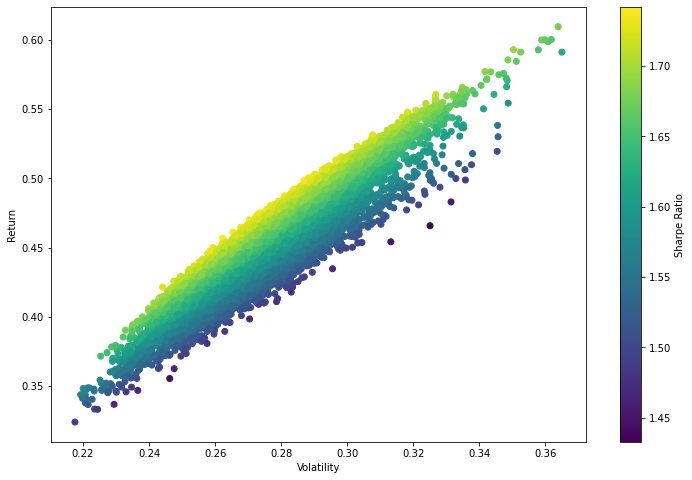

In [71]:
# plot heatmap
plt.figure(figsize=(12,8))
plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

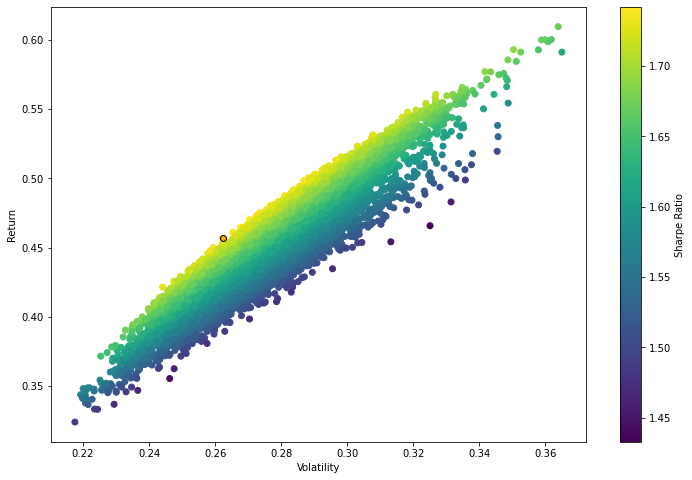

In [72]:
#Plot optimal portfolio
max_sharpe_return = returns_array[index_max_sharpe]
max_sharpe_volatility = volatility_array[index_max_sharpe]

# Plot heatmap
plt.figure(figsize=(12,8))
plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add orange dot for easy viewing
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='orange', edgecolors='black')

# The end 